# Analysis Yelp Dataset

Here we want to show reviews dataset information and do the preprocessing steps as suggested in the paper.

### Importing libraries

In [97]:
import matplotlib.pyplot as plt
import pandas as pd

### Constants

In [98]:
file_path = "data/reviews_sample.csv"

### Loading the dataset

In [99]:
df = pd.read_csv(file_path, low_memory=True)

## General Information

In [100]:
df.head(5)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,J5Q1gH4ACCj6CtQG7Yom7g,56gL9KEJNHiSDUoyjk2o3Q,8yR12PNSMo6FBYx1u5KPlw,2.0,1,0,0,Went for lunch and found that my burger was me...,2018-04-04 21:09:53
1,HlXP79ecTquSVXmjM10QxQ,bAt9OUFX9ZRgGLCXG22UmA,pBNucviUkNsiqhJv5IFpjg,5.0,0,0,0,I needed a new tires for my wife's car. They h...,2020-05-24 12:22:14
2,JBBULrjyGx6vHto2osk_CQ,NRHPcLq2vGWqgqwVugSgnQ,8sf9kv6O4GgEb0j1o22N1g,5.0,0,0,0,Jim Woltman who works at Goleta Honda is 5 sta...,2019-02-14 03:47:48
3,U9-43s8YUl6GWBFCpxUGEw,PAxc0qpqt5c2kA0rjDFFAg,XwepyB7KjJ-XGJf0vKc6Vg,4.0,0,0,0,Been here a few times to get some shrimp. The...,2013-04-27 01:55:49
4,8T8EGa_4Cj12M6w8vRgUsQ,BqPR1Dp5Rb_QYs9_fz9RiA,prm5wvpp0OHJBlrvTj9uOg,5.0,0,0,0,This is one fantastic place to eat whether you...,2019-05-15 18:29:25


In [101]:
df.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')

There are 8 columns in the dataset, including:

- `review_id`: Unique identifier for each review.
- `user_id`: Unique identifier for the user who wrote the review.
- `business_id`: Unique identifier for the business being reviewed.
- `stars`: Rating given by the user (1 to 5 stars).
- `useful`: Number of useful votes received for the review.
- `funny`: Number of funny votes received for the review.
- `cool`: Number of cool votes received for the review.
- `text`: The content of the review.
- `date`: Date when the review was written.

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69903 entries, 0 to 69902
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   review_id    69903 non-null  object 
 1   user_id      69903 non-null  object 
 2   business_id  69903 non-null  object 
 3   stars        69903 non-null  float64
 4   useful       69903 non-null  int64  
 5   funny        69903 non-null  int64  
 6   cool         69903 non-null  int64  
 7   text         69903 non-null  object 
 8   date         69903 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 4.8+ MB


So there is no missing data in the dataset.

In [103]:
df["date"] = pd.to_datetime(df["date"])

The `date` column is converted to datetime format, which allows for easier manipulation and analysis of date-related data.

In [104]:
df["stars"].value_counts()

stars
5.0    32369
4.0    14582
1.0    10576
3.0     6904
2.0     5472
Name: count, dtype: int64

In [105]:
df["stars"] = df["stars"].astype(int)

So stars are in the range of 1 to 5, and we can convert column `stars` to int type.

In [106]:
len(df[df["text"] == ""])

0

So there are no empty reviews in the dataset, which is good.

In [107]:
num_unique_users = df["user_id"].nunique()
num_unique_businesses = df["business_id"].nunique()

print(f"Number of unique users: {num_unique_users}")
print(f"Number of unique businesses: {num_unique_businesses}")

Number of unique users: 61031
Number of unique businesses: 37114


In [108]:
len(df) - len(df.drop_duplicates(subset=["text"]))

5

So there only 5 duplicate reviews in the dataset, which is negligible.

In [109]:
df.describe()

,stars,useful,funny,cool,date
count,69903.000000,69903.000000,69903.000000,69903.000000,69903
mean,3.753845,1.181165,0.323176,0.500451,2017-01-07 21:55:35.442899456
min,1.000000,0.000000,0.000000,0.000000,2005-03-12 18:37:40
25%,3.000000,0.000000,0.000000,0.000000,2015-01-28 19:35:05.500000
50%,4.000000,0.000000,0.000000,0.000000,2017-05-31 00:55:14
75%,5.000000,1.000000,0.000000,0.000000,2019-05-17 00:11:07.500000
max,5.000000,350.000000,103.000000,350.000000,2022-01-19 18:43:44
std,1.475140,3.103052,1.405651,2.356177,NaN


We are intresed in stars mean and standard deviation, which are 3.75 and 1.47 respectively. This indicates that the reviews are generally positive, but there is some variability in the ratings.

In [110]:
df.nlargest(20, "useful")

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
13883,OBBhivH7_MiEf8EClqASDg,lRRVRehFcudfbjY6yUX6FQ,47OfnYwhB3NTM8Tx_sNnbw,5,350,4,350,Everything about this place was amazing. Serv...,2012-11-06 04:35:14
29233,cimPGPfqYm1o6DtG1duHsw,JjXuiru1_ONzDkYVrHN0aw,R_7IvtCqjLpcdZjAdyQYBQ,5,118,89,120,"Our favorite Busch Gardens coaster! Smooth, fa...",2016-02-17 23:01:35
42093,DhHbyv5Em8a-iIG8J9zcrA,5_cSuEO0AJX4fnPJi2nEUw,E4ZgvbZkZwR3a393m4wcBQ,4,118,1,56,The owner is super nice. I've had my hair cut...,2012-08-23 20:04:10
68323,wQRIJaVB5AWFvBL7fAe4TQ,A4bsa7ykYRVCnb4h2vZALw,vi5xjfEhV6rnXrC_GbdhnA,3,110,69,98,When it comes to choosing a place in town for ...,2019-03-27 17:57:14
10012,Dys-g__FNrq4Gnpm9guH4g,TTgd3rYWvBR63hlFPmVm5A,_vXUaBjScB75r0yYOv-FIw,1,97,4,0,Scheduled to arrive between 12-2:00pm. Showed ...,2015-04-17 19:29:41
10080,cjs-QHwzX78TNRbfKH3L0Q,A4bsa7ykYRVCnb4h2vZALw,7kLn2XsFwyJ-yFn4qx40TQ,5,96,58,101,I can't believe I haven't written a review for...,2020-05-15 00:44:11
14395,R1CwF93kueOYz0JfgAhQEA,1F5wbSbtUBzxS8IsM7fWsA,JykoUULAfF60rAp3gjlvVw,5,96,48,85,Seafood in the desert might sound off but you'...,2018-04-25 14:37:43
56829,lp96akFrCmNuXddeKE77_Q,tsMF0FcFcHZ8i28WzWtQXw,nU-zF9XbQehltHoi_LwWRw,4,95,48,95,Sat outside on this past lovely Friday evening...,2021-10-12 17:55:15
629,-p3PZwRpuwXwc_askFyNPA,A4bsa7ykYRVCnb4h2vZALw,c3UA1gYc6VY7dEyS0135pQ,5,88,55,95,Tondi Gelatos new location is finally open! Th...,2021-03-13 23:41:16
28438,H6BF8-EJcrXW1hR3rxahYw,mrYjF9PGiexyeVWDpoLwAw,ptEqeL3qvGp9DIU-GAkSZQ,1,79,3,2,"First I called for their ""$45.00 Early Bird Sp...",2014-10-04 15:46:05


It's so interesting that most useful reviews are 1 stars

In [111]:
df.nlargest(20, "funny")

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
31990,AV1Y-s7hqmwryoVEyLJgvA,UU9aCh4ZN2N1nfFXAiJz_g,hwDDy0E5s81DNLYUnMqitQ,4,42,103,19,I always feel my chances of dying in an airpla...,2014-10-06 00:55:31
29233,cimPGPfqYm1o6DtG1duHsw,JjXuiru1_ONzDkYVrHN0aw,R_7IvtCqjLpcdZjAdyQYBQ,5,118,89,120,"Our favorite Busch Gardens coaster! Smooth, fa...",2016-02-17 23:01:35
68323,wQRIJaVB5AWFvBL7fAe4TQ,A4bsa7ykYRVCnb4h2vZALw,vi5xjfEhV6rnXrC_GbdhnA,3,110,69,98,When it comes to choosing a place in town for ...,2019-03-27 17:57:14
10080,cjs-QHwzX78TNRbfKH3L0Q,A4bsa7ykYRVCnb4h2vZALw,7kLn2XsFwyJ-yFn4qx40TQ,5,96,58,101,I can't believe I haven't written a review for...,2020-05-15 00:44:11
629,-p3PZwRpuwXwc_askFyNPA,A4bsa7ykYRVCnb4h2vZALw,c3UA1gYc6VY7dEyS0135pQ,5,88,55,95,Tondi Gelatos new location is finally open! Th...,2021-03-13 23:41:16
18141,iQl_RrwDUbOBRxgZx9533Q,zYlTuY9teqQOrrZq1pXcxw,yYyljEUFGkezQXpzRlfqQA,3,39,50,38,Big Mall. Very Big Mall. The biggest mall in N...,2011-07-12 05:47:05
14395,R1CwF93kueOYz0JfgAhQEA,1F5wbSbtUBzxS8IsM7fWsA,JykoUULAfF60rAp3gjlvVw,5,96,48,85,Seafood in the desert might sound off but you'...,2018-04-25 14:37:43
56829,lp96akFrCmNuXddeKE77_Q,tsMF0FcFcHZ8i28WzWtQXw,nU-zF9XbQehltHoi_LwWRw,4,95,48,95,Sat outside on this past lovely Friday evening...,2021-10-12 17:55:15
64119,CbHuqyMx3XgaGqZlGbbcjA,C1IAYGkz-dgKkaXJRNzpKQ,qck6waU6WlXBesRKmtsWfg,4,0,42,41,"Good fresh baked goods, good staff, good tea a...",2012-03-20 14:37:53
36887,EeoTdFqv-uVAWJE24Ezf7g,7W-p-PJlmrzg0mk3pWKoyQ,QaFbv7aLQBcfT4xMF1_WnQ,4,43,40,44,"Rockfire grill serves burgers, flatbreads, piz...",2015-03-10 14:15:49


And most funny reviews are highly rated, which is expected as funny reviews are usually more entertaining and engaging.

In [112]:
df.nlargest(20, "cool")

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
13883,OBBhivH7_MiEf8EClqASDg,lRRVRehFcudfbjY6yUX6FQ,47OfnYwhB3NTM8Tx_sNnbw,5,350,4,350,Everything about this place was amazing. Serv...,2012-11-06 04:35:14
29233,cimPGPfqYm1o6DtG1duHsw,JjXuiru1_ONzDkYVrHN0aw,R_7IvtCqjLpcdZjAdyQYBQ,5,118,89,120,"Our favorite Busch Gardens coaster! Smooth, fa...",2016-02-17 23:01:35
10080,cjs-QHwzX78TNRbfKH3L0Q,A4bsa7ykYRVCnb4h2vZALw,7kLn2XsFwyJ-yFn4qx40TQ,5,96,58,101,I can't believe I haven't written a review for...,2020-05-15 00:44:11
68323,wQRIJaVB5AWFvBL7fAe4TQ,A4bsa7ykYRVCnb4h2vZALw,vi5xjfEhV6rnXrC_GbdhnA,3,110,69,98,When it comes to choosing a place in town for ...,2019-03-27 17:57:14
629,-p3PZwRpuwXwc_askFyNPA,A4bsa7ykYRVCnb4h2vZALw,c3UA1gYc6VY7dEyS0135pQ,5,88,55,95,Tondi Gelatos new location is finally open! Th...,2021-03-13 23:41:16
56829,lp96akFrCmNuXddeKE77_Q,tsMF0FcFcHZ8i28WzWtQXw,nU-zF9XbQehltHoi_LwWRw,4,95,48,95,Sat outside on this past lovely Friday evening...,2021-10-12 17:55:15
14395,R1CwF93kueOYz0JfgAhQEA,1F5wbSbtUBzxS8IsM7fWsA,JykoUULAfF60rAp3gjlvVw,5,96,48,85,Seafood in the desert might sound off but you'...,2018-04-25 14:37:43
34589,BQDs3bF5Wc6EvX9mNfKa1Q,YTu0c-1I9ECeksIgoHXFPA,awA0KQacd4k4GUSKP8aliw,5,57,30,61,Treasure Island Beach is one of my favorite be...,2018-12-07 18:48:34
36040,fvP_q4J-2AXXViaNdFoTrA,NWKkrswnlRkSrqF1IzliDQ,p1A6pcb-Aif8dKjPGlMGfA,5,54,23,58,"This is a very clean, comfortable and convenie...",2021-03-07 13:31:52
42093,DhHbyv5Em8a-iIG8J9zcrA,5_cSuEO0AJX4fnPJi2nEUw,E4ZgvbZkZwR3a393m4wcBQ,4,118,1,56,The owner is super nice. I've had my hair cut...,2012-08-23 20:04:10


And most cool reviews are also highly rated, which is also expected as cool reviews are usually more interesting and engaging.

## Plots

Distribution of ratings is important to understand the overall sentiment of the reviews. We will plot the distribution of ratings (stars) in the dataset.

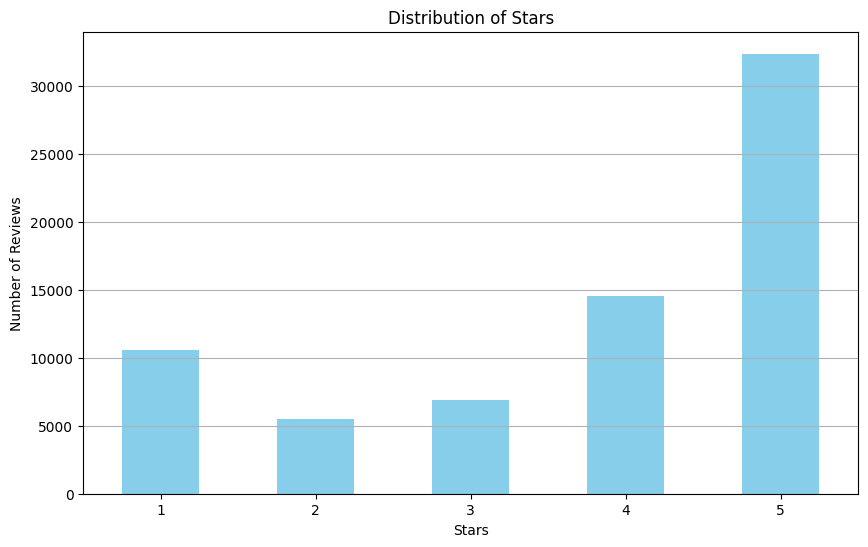

In [113]:
plt.figure(figsize=(10, 6))
df["stars"].value_counts().sort_index().plot(kind="bar", color="skyblue")
plt.title("Distribution of Stars")
plt.xlabel("Stars")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()

The distribution of ratings shows that the majority of reviews are positive, with a peak at 5 stars. This indicates that users generally have a favorable opinion of the businesses they review on Yelp.

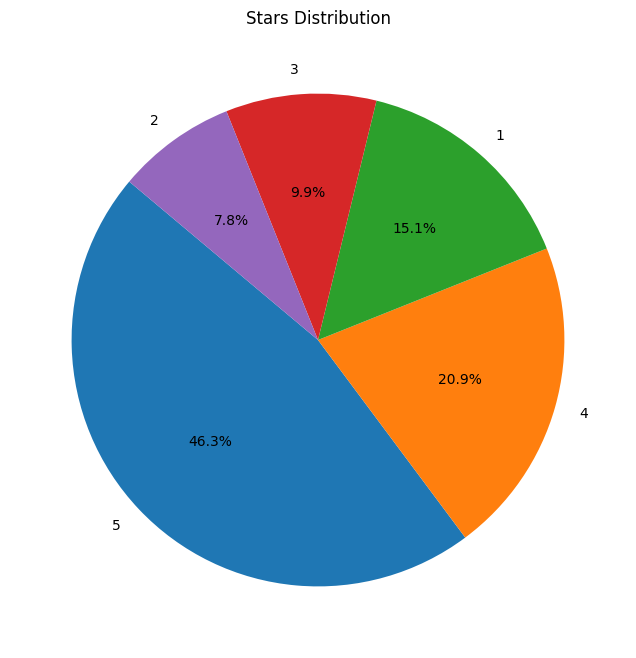

In [114]:
plt.figure(figsize=(8, 8))
df["stars"].value_counts().plot(kind="pie", autopct="%1.1f%%", startangle=140)
plt.title("Stars Distribution")
plt.ylabel("")
plt.show()

So we can assume that the dataset is biased towards positive reviews, as the majority of reviews are 4 or 5 stars. This is a common issue in sentiment analysis datasets, where positive reviews are more prevalent than negative ones.

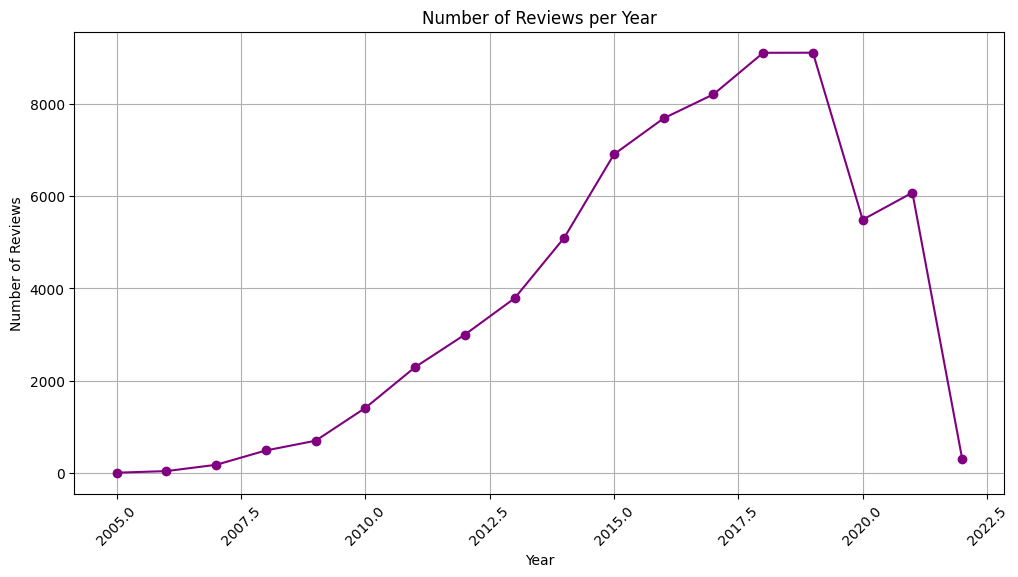

In [115]:
reviews_per_year = df["date"].dt.year.value_counts().sort_index()
plt.figure(figsize=(12, 6))
reviews_per_year.plot(kind="line", marker="o", color="purple")
plt.title("Number of Reviews per Year")
plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.grid()
plt.show()

Now draw number of reviews per year based on their 5 ratings.

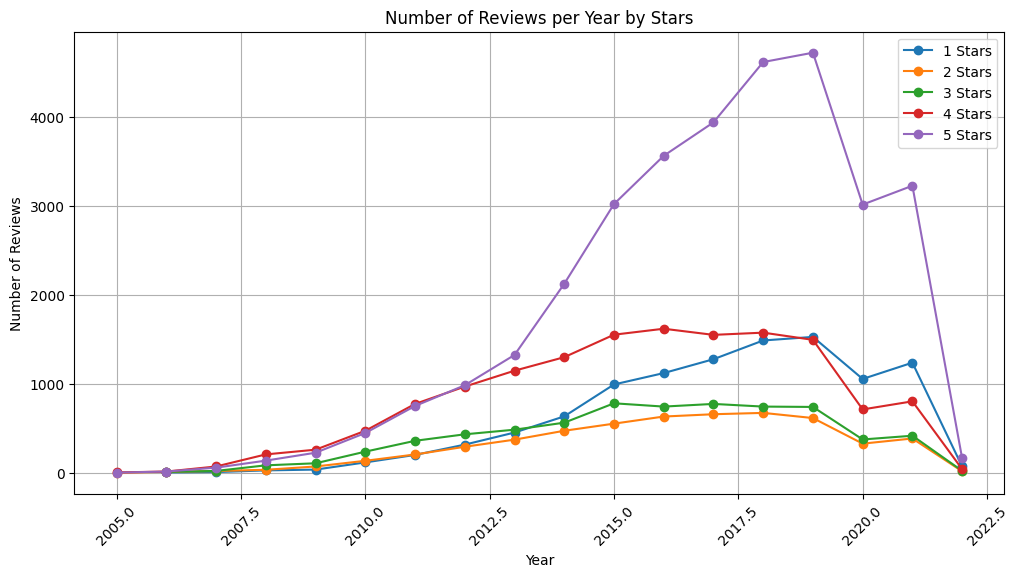

In [116]:
plt.figure(figsize=(12, 6))
for star in range(1, 6):
    reviews_per_year = (
        df[df["stars"] == star]["date"].dt.year.value_counts().sort_index()
    )
    reviews_per_year.plot(kind="line", marker="o", label=f"{star} Stars")
plt.title("Number of Reviews per Year by Stars")
plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

Now draw stacked cumulative reviews rating per year.

<Figure size 1200x600 with 0 Axes>

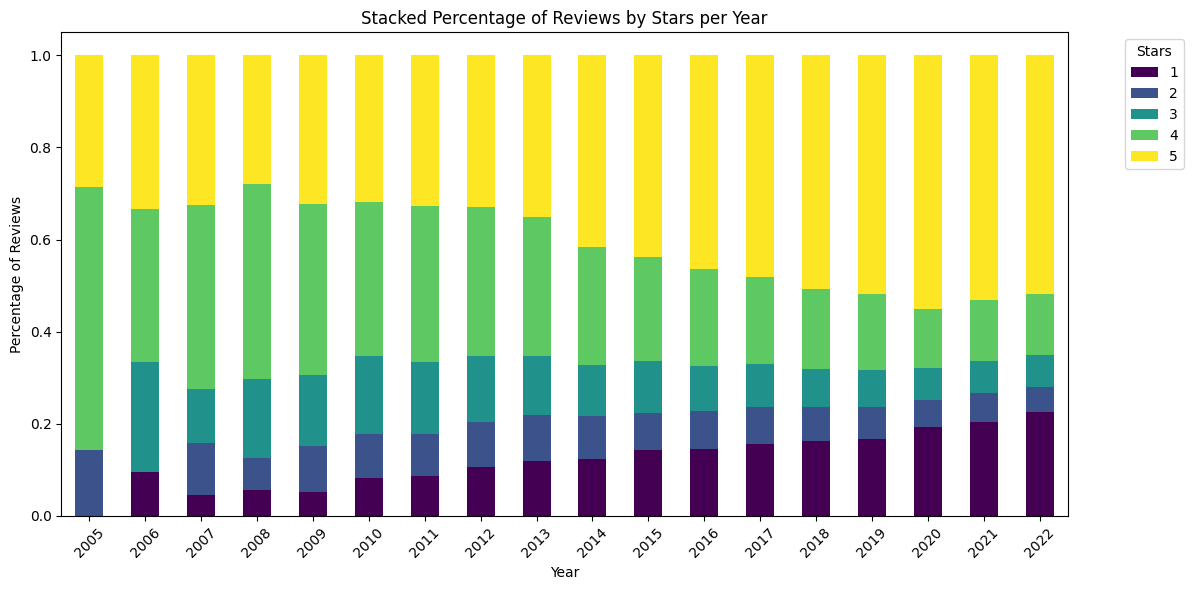

In [117]:
plt.figure(figsize=(12, 6))
reviews_per_year = (
    df.groupby(df["date"].dt.year)["stars"].value_counts().unstack().fillna(0)
)
reviews_per_year = reviews_per_year.div(
    reviews_per_year.sum(axis=1), axis=0
)  # Normalize to get percentages
reviews_per_year.plot(kind="bar", stacked=True, colormap="viridis", figsize=(12, 6))
plt.title("Stacked Percentage of Reviews by Stars per Year")
plt.xlabel("Year")
plt.ylabel("Percentage of Reviews")
plt.xticks(rotation=45)
plt.legend(title="Stars", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

This is very interesting, as we can see that the percentage of 5-star reviews has been increasing over the years, also the percentage of 1-star reviews has been increasing as well.
And the percentage of 2-star reviews hasn't changed much, while the percentage of 3-star and 4-star reviews has been decreasing.

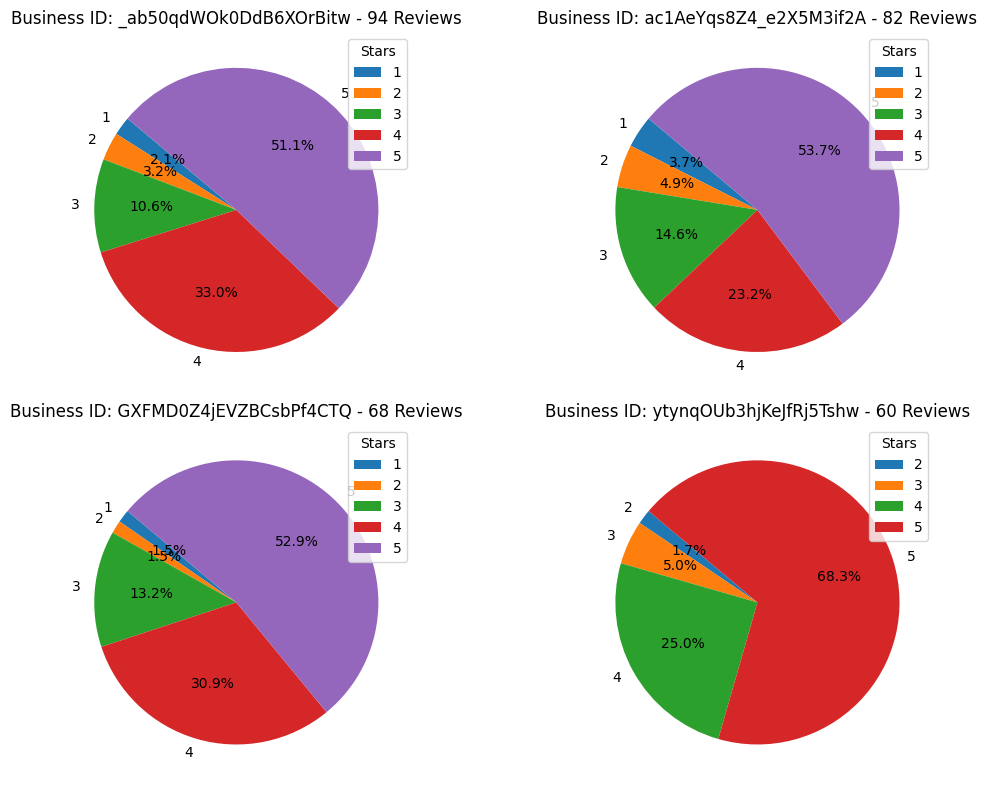

In [118]:
businesses_grouped = df.groupby("business_id").size().reset_index(name="review_count")
top_businesses = businesses_grouped.nlargest(4, "review_count")
plt.figure(figsize=(12, 8))
for i, (index, row) in enumerate(top_businesses.iterrows()):
    business_reviews = df[df["business_id"] == row["business_id"]]
    plt.subplot(2, 2, i + 1)
    business_reviews["stars"].value_counts().sort_index().plot(
        kind="pie", autopct="%1.1f%%", startangle=140
    )
    plt.title(f"Business ID: {row['business_id']} - {row['review_count']} Reviews")
    plt.ylabel("")
    plt.legend(title="Stars", loc="upper right")
plt.tight_layout()
plt.show()

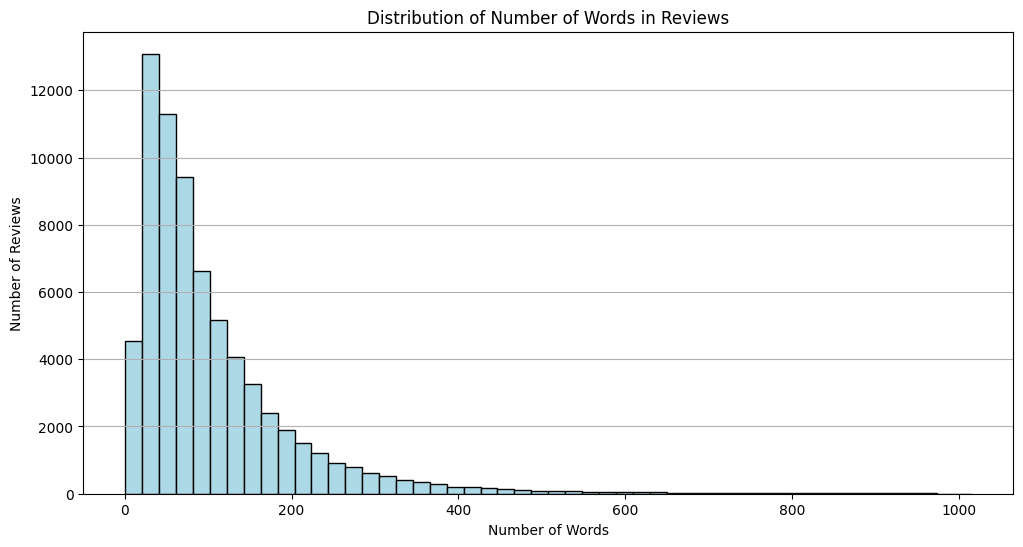

In [119]:
plt.figure(figsize=(12, 6))
df["words_count"] = df["text"].apply(lambda x: len(x.split()))
df["words_count"].plot(kind="hist", bins=50, color="lightblue", edgecolor="black")
plt.title("Distribution of Number of Words in Reviews")
plt.xlabel("Number of Words")
plt.ylabel("Number of Reviews")
plt.grid(axis="y")
plt.show()

<Figure size 1200x600 with 0 Axes>

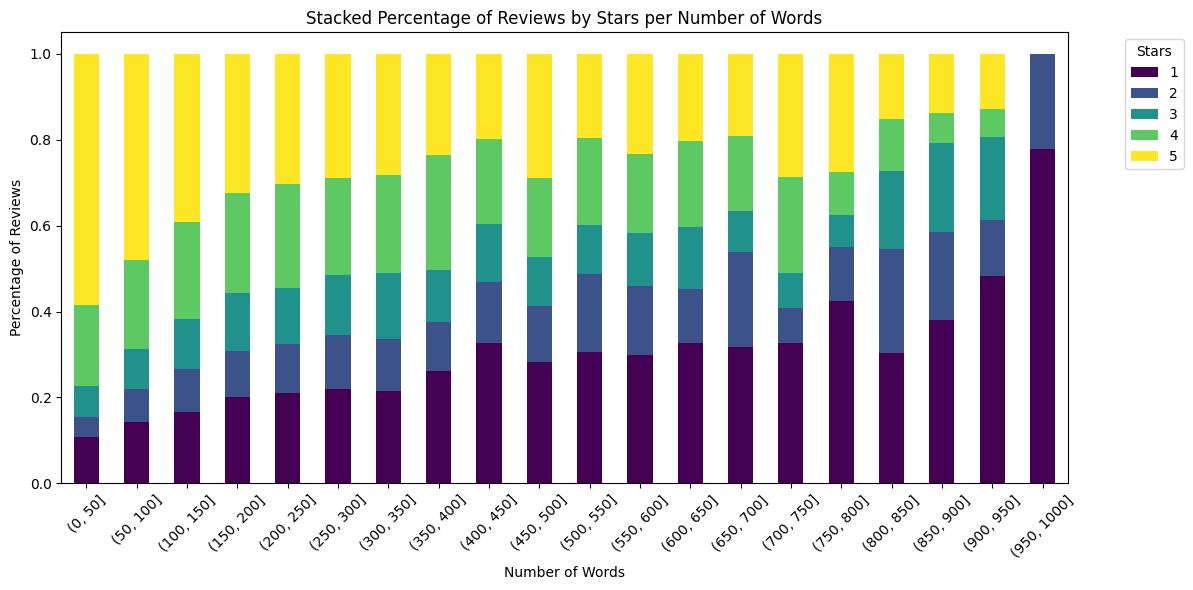

In [120]:
plt.figure(figsize=(12, 6))
reviews_per_words = (
    df.groupby(pd.cut(df["words_count"], bins=range(0, 1001, 50)), observed=True)[
        "stars"
    ]
    .value_counts()
    .unstack()
    .fillna(0)
)
reviews_per_words = reviews_per_words.div(
    reviews_per_words.sum(axis=1), axis=0
)  # Normalize to get percentages
reviews_per_words.plot(kind="bar", stacked=True, colormap="viridis", figsize=(12, 6))
plt.title("Stacked Percentage of Reviews by Stars per Number of Words")
plt.xlabel("Number of Words")
plt.ylabel("Percentage of Reviews")
plt.xticks(rotation=45)
plt.legend(title="Stars", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

Very interesting, It seems lower ratings are more likely to have more words, while higher ratings are more likely to have fewer words. This could indicate that users tend to write more detailed reviews when they are dissatisfied with a service or product, while satisfied users may express their feelings more succinctly.